In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import requests

sns.set()

In [2]:
dead_url = 'http://api.scb.se/OV0104/v1/doris/sv/ssd/START/BE/BE0101/BE0101I/DodaHandelseK'
dead_query = {
  "query": [
    {
      "code": "Region",
      "selection": {
        "filter": "vs:RegionRiket99",
        "values": [
          "00"
        ]
      }
    },
    {
      "code": "Alder",
      "selection": {
        "filter": "vs:Ålder1årA",
        "values": [
          "0",
          "1",
          "2",
          "3",
          "4",
          "5",
          "6",
          "7",
          "8",
          "9",
          "10",
          "11",
          "12",
          "13",
          "14",
          "15",
          "16",
          "17",
          "18",
          "19",
          "20",
          "21",
          "22",
          "23",
          "24",
          "25",
          "26",
          "27",
          "28",
          "29",
          "30",
          "31",
          "32",
          "33",
          "34",
          "35",
          "36",
          "37",
          "38",
          "39",
          "40",
          "41",
          "42",
          "43",
          "44",
          "45",
          "46",
          "47",
          "48",
          "49",
          "50",
          "51",
          "52",
          "53",
          "54",
          "55",
          "56",
          "57",
          "58",
          "59",
          "60",
          "61",
          "62",
          "63",
          "64",
          "65",
          "66",
          "67",
          "68",
          "69",
          "70",
          "71",
          "72",
          "73",
          "74",
          "75",
          "76",
          "77",
          "78",
          "79",
          "80",
          "81",
          "82",
          "83",
          "84",
          "85",
          "86",
          "87",
          "88",
          "89",
          "90",
          "91",
          "92",
          "93",
          "94",
          "95",
          "96",
          "97",
          "98",
          "99",
          "100+"
        ]
      }
    },
    {
      "code": "Kon",
      "selection": {
        "filter": "item",
        "values": [
          "1",
          "2"
        ]
      }
    }
  ],
  "response": {
    "format": "json"
  }
}

pop_url = 'http://api.scb.se/OV0104/v1/doris/sv/ssd/START/BE/BE0101/BE0101A/FolkmangdNov'
pop_query = {
  "query": [
    {
      "code": "Region",
      "selection": {
        "filter": "vs:RegionRiket99",
        "values": [
          "00"
        ]
      }
    },
    {
      "code": "Alder",
      "selection": {
        "filter": "vs:Ålder1årA",
        "values": [
          "0",
          "1",
          "2",
          "3",
          "4",
          "5",
          "6",
          "7",
          "8",
          "9",
          "10",
          "11",
          "12",
          "13",
          "14",
          "15",
          "16",
          "17",
          "18",
          "19",
          "20",
          "21",
          "22",
          "23",
          "24",
          "25",
          "26",
          "27",
          "28",
          "29",
          "30",
          "31",
          "32",
          "33",
          "34",
          "35",
          "36",
          "37",
          "38",
          "39",
          "40",
          "41",
          "42",
          "43",
          "44",
          "45",
          "46",
          "47",
          "48",
          "49",
          "50",
          "51",
          "52",
          "53",
          "54",
          "55",
          "56",
          "57",
          "58",
          "59",
          "60",
          "61",
          "62",
          "63",
          "64",
          "65",
          "66",
          "67",
          "68",
          "69",
          "70",
          "71",
          "72",
          "73",
          "74",
          "75",
          "76",
          "77",
          "78",
          "79",
          "80",
          "81",
          "82",
          "83",
          "84",
          "85",
          "86",
          "87",
          "88",
          "89",
          "90",
          "91",
          "92",
          "93",
          "94",
          "95",
          "96",
          "97",
          "98",
          "99",
          "100+"
        ]
      }
    },
    {
      "code": "Kon",
      "selection": {
        "filter": "item",
        "values": [
          "1",
          "2"
        ]
      }
    }
  ],
  "response": {
    "format": "json"
  }
}

In [3]:
def get_data(url,query):
    r = requests.post(url,json=query)
    
    if r.status_code != 200 :
        print (r.status_code)
    
    data = pd.DataFrame.from_dict(r.json()['data'])
    data[['area','age','gender','year']] = data['key'].to_list()
    data['count'] = data['values'].apply(lambda x : x[0])
    data['age'] = data['age'].apply(lambda x : x.replace('+','')).astype(int)
    data.drop(['values','key','area'],axis=1,inplace=True)
    data.set_index('year',inplace=True)
    data['count'] = data['count'].astype(int)
    data = data.groupby(['year','age']).sum()
    
    return data
    


In [4]:
dead_df = get_data(dead_url,dead_query)
dead_df

count
year age       
1968 0     1478
     1       87
     2       63
     3       62
     4       50
...         ...
2020 96    1789
     97    1270
     98    1065
     99     759
     100   1247

[5353 rows x 1 columns]

In [5]:
pop_df = get_data(pop_url,pop_query)
pop_df

count
year age       
2002 0    82336
     1    92580
     2    92138
     3    90251
     4    91214
...         ...
2020 96    5709
     97    3972
     98    2707
     99    1915
     100   2715

[1919 rows x 1 columns]

In [6]:
def bin_category(df,binsize=10):
    
    binned = pd.cut(df.index.get_level_values(1),range(-1,100+binsize,binsize),labels=range(0,100+binsize,binsize))
    return binned

In [7]:
def binit(df,binsize=10):
    return df.groupby(['year',bin_category(df,binsize=binsize)]).sum()
    


In [8]:
dead_bin_5 = binit(dead_df,binsize=5)
pop_bin_5 = binit(pop_df,binsize=5)

dead_bin_1 = binit(dead_df,binsize=1)
pop_bin_1 = binit(pop_df,binsize=1)

In [9]:
def agg_bin_data(pop,dead):
    
    bin_data = pd.concat([pop,dead],axis=1).dropna()
    bin_data.columns = ['pop','dead']
    bin_data['mortality'] = bin_data['dead'] / bin_data['pop']
    bin_data.index.names=('year','age_grp')
    return bin_data

In [10]:
bin_1_data = agg_bin_data(pop_bin_1,dead_bin_1)
bin_5_data = agg_bin_data(pop_bin_5,dead_bin_5)

print (bin_1_data.head())

# sanity check # 
((bin_5_data.groupby('year').sum() == bin_1_data.groupby('year').sum()).all()) & \
(bin_1_data.groupby('year').sum().loc['2020','dead'] == 98124)

                  pop  dead  mortality
year age_grp                          
2002 0        82336.0   313   0.003801
     1        92580.0    24   0.000259
     2        92138.0    25   0.000271
     3        90251.0    10   0.000111
     4        91214.0    10   0.000110


pop           True
dead          True
mortality    False
dtype: bool

In [11]:
bin_1_data.to_pickle('bin_1_data.pkl')

In [12]:
yearly_stats = bin_1_data.groupby('year')[['pop','dead']].sum()
yearly_stats

,pop,dead
year,,
2002,8939367.0,95009
2003,8973472.0,92961
2004,9008883.0,90532
2005,9042663.0,91710
2006,9107935.0,91177
2007,9174464.0,91729
2008,9248976.0,91449
2009,9331619.0,90080
2010,9408320.0,90487


In [13]:
yearly_stats_base_15_18 = yearly_stats.loc['2015' : '2018'].mean()
yearly_stats_base_15_18

pop     10031350.0
dead       91511.5
dtype: float64

In [14]:
yearly_growth = yearly_stats / yearly_stats.shift()
yearly_growth

,pop,dead
year,,
2002,NaN,NaN
2003,1.003815,0.978444
2004,1.003946,0.973871
2005,1.003750,1.013012
2006,1.007218,0.994188
2007,1.007305,1.006054
2008,1.008122,0.996948
2009,1.008935,0.985030
2010,1.008219,1.004518


/usr/local/lib64/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


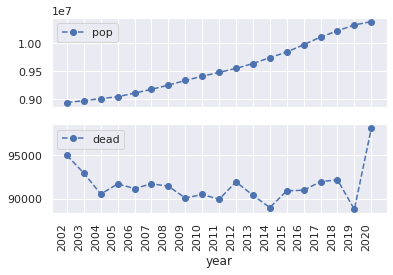

In [15]:
axes = yearly_stats.plot(subplots=True,style='o--',sharex=True)

axes[1].set_xticks(range(len(yearly_stats)))
_= axes[1].set_xticklabels(range(2002,2021),rotation=90)

/usr/local/lib64/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='year'>

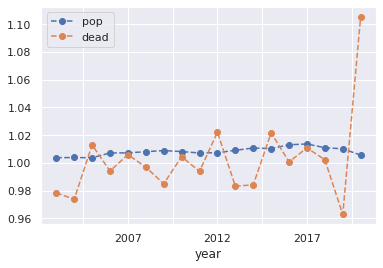

In [16]:
yearly_growth.plot(style='o--')

In [17]:
bin_1_base_15_18 = bin_1_data.loc['2015' : '2018'].groupby(['age_grp']).mean()
bin_1_base_15_19 = bin_1_data.loc['2015' : '2019'].groupby(['age_grp']).mean()

bin_1_base_15_18

,pop,dead,mortality
age_grp,,,
0,100028.50,271.75,0.002717
1,118966.75,22.25,0.000187
2,119993.75,15.75,0.000131
3,119949.50,9.50,0.000079
4,120195.75,12.00,0.000100
...,...,...,...
96,5382.25,1620.00,0.300639
97,3726.00,1214.50,0.326506
98,2399.00,843.25,0.352301


In [18]:
bin_1_base_15_18_expected = bin_1_base_15_18['mortality'] * bin_1_data['pop']
bin_1_base_15_18_expected_tot = bin_1_base_15_18_expected.groupby('year').sum()

bin_1_base_15_19_expected = bin_1_base_15_19['mortality'] * bin_1_data['pop']
bin_1_base_15_19_expected_tot = bin_1_base_15_19_expected.groupby('year').sum()

bin_1_base_15_18_expected_tot

year
2002    75379.151432
2003    76250.098820
2004    77400.050413
2005    78413.019399
2006    79551.630758
2007    80490.219711
2008    81488.049896
2009    82582.684679
2010    83829.415068
2011    84948.437640
2012    85859.997359
2013    86929.531298
2014    88359.249532
2015    89540.253570
2016    90987.416605
2017    92182.273875
2018    93502.375723
2019    95513.758999
2020    96947.611871
dtype: float64

In [19]:
bin_1_actuals = bin_1_data.groupby(['year'])['dead'].sum()
bin_1_actuals

year
2002    95009
2003    92961
2004    90532
2005    91710
2006    91177
2007    91729
2008    91449
2009    90080
2010    90487
2011    89938
2012    91938
2013    90402
2014    88976
2015    90907
2016    90982
2017    91972
2018    92185
2019    88766
2020    98124
Name: dead, dtype: int64

In [20]:
bin_1_excess = pd.DataFrame()
bin_1_excess['age_mort_base_15_18'] = bin_1_data.groupby('year')['dead'].sum() - bin_1_base_15_18_expected_tot
bin_1_excess['age_mort_base_15_18_pct'] = bin_1_data.groupby('year')['dead'].sum() / bin_1_base_15_18_expected_tot

bin_1_excess['age_mort_base_15_19'] = bin_1_data.groupby('year')['dead'].sum() - bin_1_base_15_19_expected_tot
bin_1_excess['age_mort_base_15_19_pct'] = bin_1_data.groupby('year')['dead'].sum() / bin_1_base_15_19_expected_tot

bin_1_excess

,age_mort_base_15_18,age_mort_base_15_18_pct,age_mort_base_15_19,age_mort_base_15_19_pct
year,,,,
2002,19629.848568,1.260415,20713.960429,1.278807
2003,16710.901180,1.219159,17806.909031,1.236939
2004,13131.949587,1.169663,14243.764789,1.186710
2005,13296.980601,1.169576,14424.331300,1.186637
2006,11625.369242,1.146136,12763.240286,1.162768
2007,11238.780289,1.139629,12388.704908,1.156146
2008,9960.950104,1.122238,11124.537998,1.138495
2009,7497.315321,1.090786,8680.300601,1.106638
2010,6657.584932,1.079418,7852.950629,1.095033


/usr/local/lib64/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/usr/local/lib64/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


Text(0.5, 0.98, 'SWE excess deaths by age specific mortality [1 year bins] two baselines\nDataSource : scb.se')

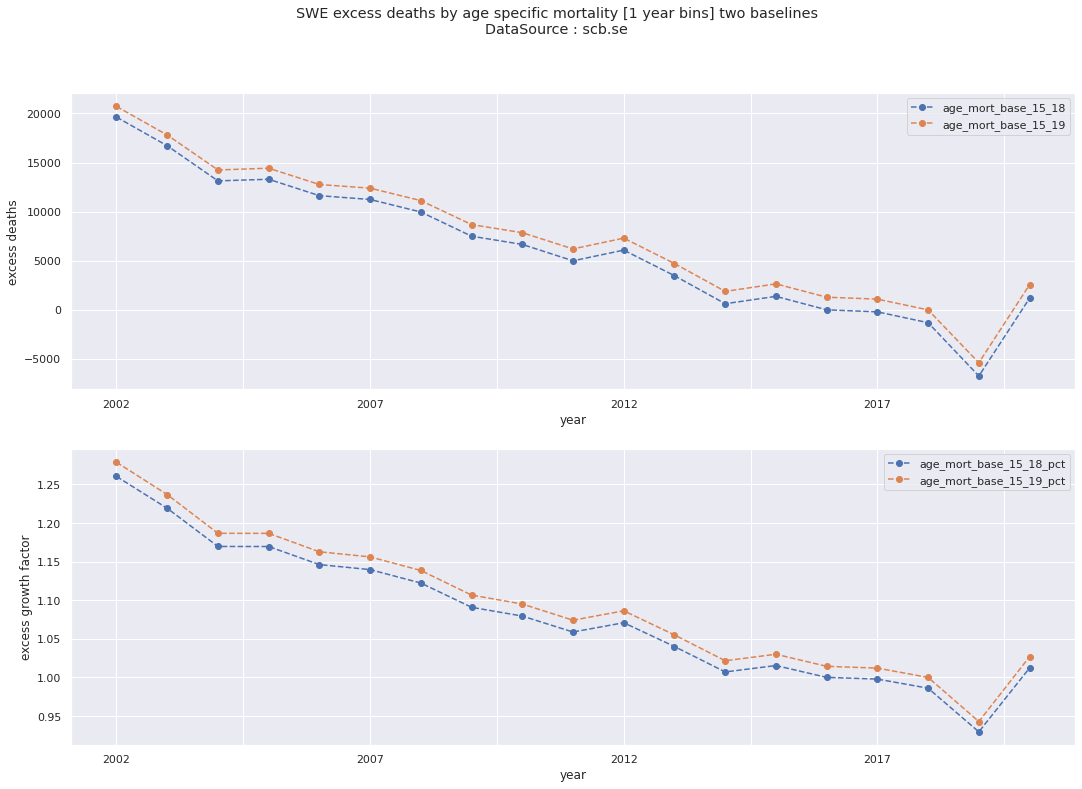

In [21]:
fig,axes = plt.subplots(2)

bin_1_excess.plot(ax = axes[0],y=['age_mort_base_15_18','age_mort_base_15_19'],figsize=(18,12),style='o--')
axes[0].set_ylabel('excess deaths')

bin_1_excess.plot(ax=axes[1],y=['age_mort_base_15_18_pct','age_mort_base_15_19_pct'],style='o--')
axes[1].set_ylabel('excess growth factor')

plt.suptitle('SWE excess deaths by age specific mortality [1 year bins] two baselines\nDataSource : scb.se')

In [22]:
abs_excess = pd.DataFrame()

abs_excess['abs_base_15_18'] = bin_1_data.groupby('year')['dead'].sum() - bin_1_base_15_18['dead'].sum()
abs_excess['abs_base_15_18_pct'] = bin_1_data.groupby('year')['dead'].sum() / bin_1_base_15_18['dead'].sum()

abs_excess['abs_base_15_19'] = bin_1_data.groupby('year')['dead'].sum() - bin_1_base_15_19['dead'].sum()
abs_excess['abs_base_15_19_pct'] = bin_1_data.groupby('year')['dead'].sum() / bin_1_base_15_19['dead'].sum()

abs_excess

,abs_base_15_18,abs_base_15_18_pct,abs_base_15_19,abs_base_15_19_pct
year,,,,
2002,3497.5,1.038219,4046.6,1.044487
2003,1449.5,1.015840,1998.6,1.021972
2004,-979.5,0.989296,-430.4,0.995268
2005,198.5,1.002169,747.6,1.008219
2006,-334.5,0.996345,214.6,1.002359
2007,217.5,1.002377,766.6,1.008428
2008,-62.5,0.999317,486.6,1.005349
2009,-1431.5,0.984357,-882.4,0.990299
2010,-1024.5,0.988805,-475.4,0.994774


In [23]:
import scipy.stats as sps

trend_start = 2015
trend_end = 2018

def find_slope_intercept(s):
    s.index = s.index.astype(int)
    slope,intercept,_,_,_ = sps.linregress(np.arange(trend_start,trend_end + 1),s.loc[trend_start:trend_end])
    return slope,intercept
    
    
bin_1_data_flat = bin_1_data['mortality'].unstack()
bin_1_trend = bin_1_data_flat.apply(find_slope_intercept).T
bin_1_trend.columns = ['slope','intercept']
bin_1_trend

,slope,intercept
age_grp,,
0,-0.000160,0.324571
1,0.000014,-0.027084
2,-0.000005,0.010258
3,0.000009,-0.018222
4,-0.000005,0.010156
...,...,...
96,0.013412,-26.743913
97,-0.000332,0.996433
98,-0.002702,5.800448


<AxesSubplot:xlabel='age_grp'>

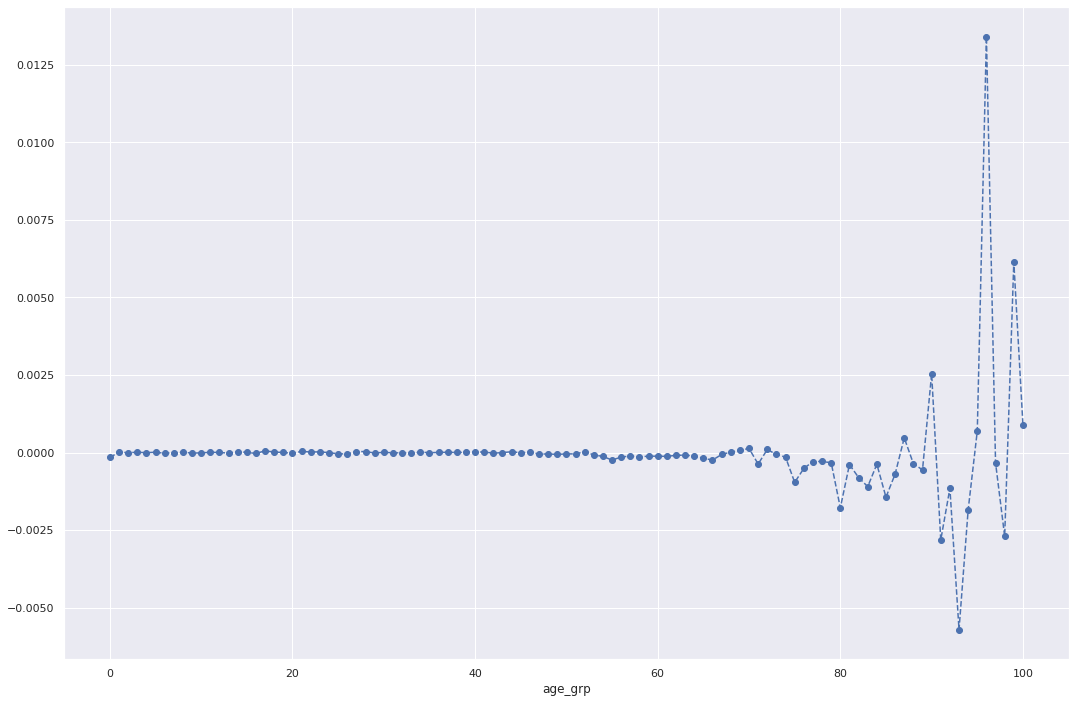

In [24]:

bin_1_trend['slope'].plot(figsize=(18,12),style='o--')

In [25]:
X = np.arange(2002,2021)
bin_1_trend_mortality = pd.DataFrame([X[i] * bin_1_trend['slope'] + \
                                        bin_1_trend['intercept'] for i in range(len(X))]) 

bin_1_trend_mortality.index = np.arange(2002,2021).astype(str)

bin_1_trend_mortality

age_grp,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
2002,0.005031,-0.000009,0.000204,-0.000053,0.000172,-0.000077,0.000459,0.000137,-1.758299e-05,0.000280,...,0.220838,0.215819,0.308007,0.277645,0.265607,0.106170,0.331323,0.391477,0.296473,0.451022
2003,0.004871,0.000005,0.000199,-0.000043,0.000167,-0.000066,0.000434,0.000131,-1.196139e-05,0.000263,...,0.218019,0.214664,0.302296,0.275795,0.266303,0.119582,0.330991,0.388775,0.302623,0.451910
2004,0.004712,0.000018,0.000194,-0.000034,0.000162,-0.000056,0.000408,0.000126,-6.339782e-06,0.000246,...,0.215201,0.213508,0.296585,0.273945,0.266999,0.132994,0.330659,0.386073,0.308773,0.452799
2005,0.004552,0.000032,0.000189,-0.000025,0.000157,-0.000046,0.000383,0.000121,-7.181779e-07,0.000229,...,0.212382,0.212352,0.290874,0.272095,0.267695,0.146405,0.330326,0.383371,0.314923,0.453687
2006,0.004392,0.000045,0.000184,-0.000016,0.000152,-0.000036,0.000357,0.000116,4.903426e-06,0.000212,...,0.209563,0.211196,0.285162,0.270246,0.268392,0.159817,0.329994,0.380669,0.321073,0.454576
2007,0.004233,0.000059,0.000179,-0.000007,0.000147,-0.000025,0.000332,0.000110,1.052503e-05,0.000196,...,0.206744,0.210041,0.279451,0.268396,0.269088,0.173229,0.329662,0.377968,0.327224,0.455464
2008,0.004073,0.000072,0.000174,0.000002,0.000142,-0.000015,0.000307,0.000105,1.614663e-05,0.000179,...,0.203925,0.208885,0.273740,0.266546,0.269784,0.186640,0.329330,0.375266,0.333374,0.456352
2009,0.003914,0.000086,0.000169,0.000011,0.000137,-0.000005,0.000281,0.000100,2.176824e-05,0.000162,...,0.201107,0.207729,0.268029,0.264696,0.270480,0.200052,0.328997,0.372564,0.339524,0.457241
2010,0.003754,0.000099,0.000164,0.000020,0.000132,0.000006,0.000256,0.000094,2.738984e-05,0.000145,...,0.198288,0.206573,0.262318,0.262846,0.271176,0.213463,0.328665,0.369862,0.345674,0.458129
2011,0.003594,0.000113,0.000159,0.000029,0.000127,0.000016,0.000230,0.000089,3.301145e-05,0.000128,...,0.195469,0.205417,0.256606,0.260997,0.271872,0.226875,0.328333,0.367160,0.351824,0.459018


In [26]:
bin_1_pop_flat = bin_1_data['pop'].unstack()
bin_1_trend_expectation = bin_1_pop_flat * bin_1_trend_mortality
bin_1_trend_expectation_tot = bin_1_trend_expectation.sum(axis=1)
print (bin_1_trend_expectation_tot)
print()
bin_1_trend_expectation

year
2002    86447.162852
2003    86712.493287
2004    87044.999840
2005    87387.098316
2006    87728.661378
2007    87771.864459
2008    88015.922383
2009    88351.214942
2010    88816.901423
2011    89237.139770
2012    89403.340203
2013    89732.358525
2014    90387.368057
2015    90752.915355
2016    91391.487336
2017    91765.355952
2018    92201.127578
2019    93276.497638
2020    93767.424520
dtype: float64



age_grp,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
year,,,,,,,,,,,,,,,,,,,,,
2002,414.224344,-0.807096,18.810862,-4.740488,15.709370,-7.079183,44.530206,14.327994,-1.999960,33.224752,...,3128.172629,2407.249733,2691.674226,1743.887617,1229.496033,342.611780,688.157933,536.322823,276.609017,551.599986
2003,413.324222,0.466302,18.545515,-4.021508,15.164835,-6.090490,40.217033,12.799731,-1.259319,29.996375,...,3208.591309,2448.882845,2647.205392,1850.860798,1254.022404,398.566802,743.074361,553.615214,270.847467,592.906512
2004,407.315421,1.835253,18.931762,-3.213787,15.081409,-5.110994,37.581455,11.734750,-0.619790,25.990173,...,3215.957860,2572.983390,2691.506372,1855.431279,1348.346991,458.828020,787.298088,600.729502,292.099305,622.598400
2005,395.379222,3.250451,19.045213,-2.476934,14.743505,-4.273458,34.949626,11.154166,-0.067061,22.462643,...,3213.761793,2587.085690,2756.317533,1906.572799,1364.979219,544.920374,828.788839,618.761053,324.370929,660.114909
2006,400.820810,4.662946,18.955070,-1.646545,15.021966,-3.353642,33.632579,10.618930,0.456014,19.989805,...,3118.717251,2598.559708,2767.500393,2005.222572,1409.592382,597.395531,871.184524,663.126054,343.227479,697.773558
2007,389.701586,6.324532,18.554155,-0.741463,15.047862,-2.505867,31.575086,10.450787,0.974912,18.331691,...,3192.958442,2533.929384,2719.059494,1992.838905,1509.043327,656.709315,870.307455,670.892476,385.796619,720.544038
2008,382.843813,7.895355,18.871206,0.201767,14.896671,-1.540460,30.693535,10.073095,1.543747,16.722838,...,3227.528663,2607.508911,2622.154806,2004.692425,1511.328181,754.772762,889.519497,683.359037,395.047925,772.604579
2009,374.338661,9.521084,18.589470,1.203627,14.484456,-0.492196,29.183086,10.058699,2.106360,15.630911,...,3171.050535,2692.583645,2660.185181,1941.811154,1537.136421,827.414158,955.737647,692.596520,398.940651,802.000302
2010,372.139672,11.269974,18.300316,2.220661,14.555729,0.596329,27.117896,9.858017,2.777029,14.147814,...,3255.887737,2676.569695,2722.593701,2031.013819,1500.958161,900.602122,981.394424,746.751862,435.549416,830.588151


In [27]:
bin_1_trend_excess = pd.DataFrame(bin_1_data.groupby('year')['dead'].sum() - bin_1_trend_expectation_tot,
                                  columns = ['bin_1_15_18_trend'])

bin_1_trend_excess['bin_1_15_18_trend_pct'] = bin_1_data.groupby('year')['dead'].sum() /\
bin_1_trend_expectation_tot
bin_1_trend_excess

,bin_1_15_18_trend,bin_1_15_18_trend_pct
year,,
2002,8561.837148,1.099041
2003,6248.506713,1.072060
2004,3487.000160,1.040060
2005,4322.901684,1.049468
2006,3448.338622,1.039307
2007,3957.135541,1.045084
2008,3433.077617,1.039005
2009,1728.785058,1.019567
2010,1670.098577,1.018804


In [28]:
all_excess = pd.concat([bin_1_excess,abs_excess,bin_1_trend_excess],axis=1)
all_excess

,age_mort_base_15_18,age_mort_base_15_18_pct,age_mort_base_15_19,age_mort_base_15_19_pct,abs_base_15_18,abs_base_15_18_pct,abs_base_15_19,abs_base_15_19_pct,bin_1_15_18_trend,bin_1_15_18_trend_pct
year,,,,,,,,,,
2002,19629.848568,1.260415,20713.960429,1.278807,3497.5,1.038219,4046.6,1.044487,8561.837148,1.099041
2003,16710.901180,1.219159,17806.909031,1.236939,1449.5,1.015840,1998.6,1.021972,6248.506713,1.072060
2004,13131.949587,1.169663,14243.764789,1.186710,-979.5,0.989296,-430.4,0.995268,3487.000160,1.040060
2005,13296.980601,1.169576,14424.331300,1.186637,198.5,1.002169,747.6,1.008219,4322.901684,1.049468
2006,11625.369242,1.146136,12763.240286,1.162768,-334.5,0.996345,214.6,1.002359,3448.338622,1.039307
2007,11238.780289,1.139629,12388.704908,1.156146,217.5,1.002377,766.6,1.008428,3957.135541,1.045084
2008,9960.950104,1.122238,11124.537998,1.138495,-62.5,0.999317,486.6,1.005349,3433.077617,1.039005
2009,7497.315321,1.090786,8680.300601,1.106638,-1431.5,0.984357,-882.4,0.990299,1728.785058,1.019567
2010,6657.584932,1.079418,7852.950629,1.095033,-1024.5,0.988805,-475.4,0.994774,1670.098577,1.018804


/usr/local/lib64/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


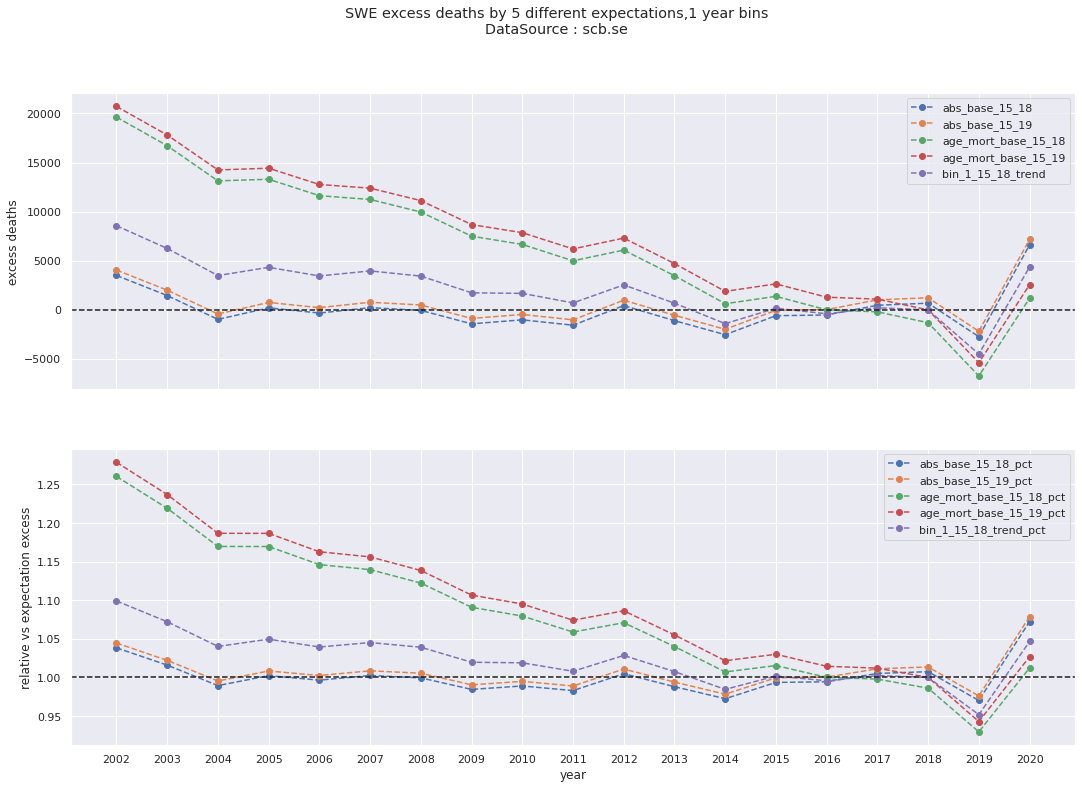

In [29]:
fig,axes = plt.subplots(2,sharex=True)

all_excess.plot(ax = axes[0],
                y=['abs_base_15_18','abs_base_15_19',
                   'age_mort_base_15_18','age_mort_base_15_19',
                  'bin_1_15_18_trend'],
                figsize=(18,12),style='o--')

axes[0].set_ylabel('excess deaths')
axes[0].axhline(0,ls='dashed',color='k')


all_excess.plot(ax=axes[1],
                y=['abs_base_15_18_pct','abs_base_15_19_pct',
                   'age_mort_base_15_18_pct','age_mort_base_15_19_pct',
                  'bin_1_15_18_trend_pct'],
                style='o--')

axes[1].set_ylabel('relative vs expectation excess')

axes[1].set_xticks(range(len(all_excess)))
axes[1].set_xticklabels(range(2002,2021))
axes[1].axhline(1,ls='dashed',color='k')

plt.suptitle('SWE excess deaths by 5 different expectations,1 year bins\nDataSource : scb.se')
plt.savefig('SCB_ALL_EXCESS.jpg',format='jpg')

In [30]:
bin_5_data

pop   dead  mortality
year age_grp                            
2002 0        448519.0    382   0.000852
     5        526779.0     36   0.000068
     10       622052.0     67   0.000108
     15       531819.0    173   0.000325
     20       516284.0    274   0.000531
...                ...    ...        ...
2020 80       284113.0  16108   0.056696
     85       166896.0  18466   0.110644
     90        79469.0  16076   0.202293
     95        21841.0   6977   0.319445
     100        2715.0   1247   0.459300

[399 rows x 3 columns]

In [31]:
dead_bin_10 = binit(dead_df,binsize=10)
pop_bin_10 = binit(pop_df,binsize=10)

dead_bin_20 = binit(dead_df,binsize=20)
pop_bin_20 = binit(pop_df,binsize=20)

dead_bin_1 = binit(dead_df,binsize=1)
pop_bin_1 = binit (pop_df,binsize=1)

age_mort_bin_10 = (dead_bin_10 / pop_bin_10).unstack().droplevel(0,axis=1).dropna()
baseline_age_mort_bin_10 = age_mort_bin_10.loc['2015' : '2018'].mean()

age_mort_bin_5 = (dead_bin_5 / pop_bin_5).unstack().droplevel(0,axis=1).dropna()
baseline_age_mort_bin_5 = age_mort_bin_5.loc['2015' : '2018'].mean()

age_mort_bin_1 = (dead_bin_1 / pop_bin_1).unstack().droplevel(0,axis=1).dropna()
baseline_age_mort_bin_1 = age_mort_bin_1.loc['2015' : '2018'].mean()

age_mort_bin_20 = (dead_bin_20 / pop_bin_20).unstack().droplevel(0,axis=1).dropna()
baseline_age_mort_bin_20 = age_mort_bin_20.loc['2015' : '2018'].mean()


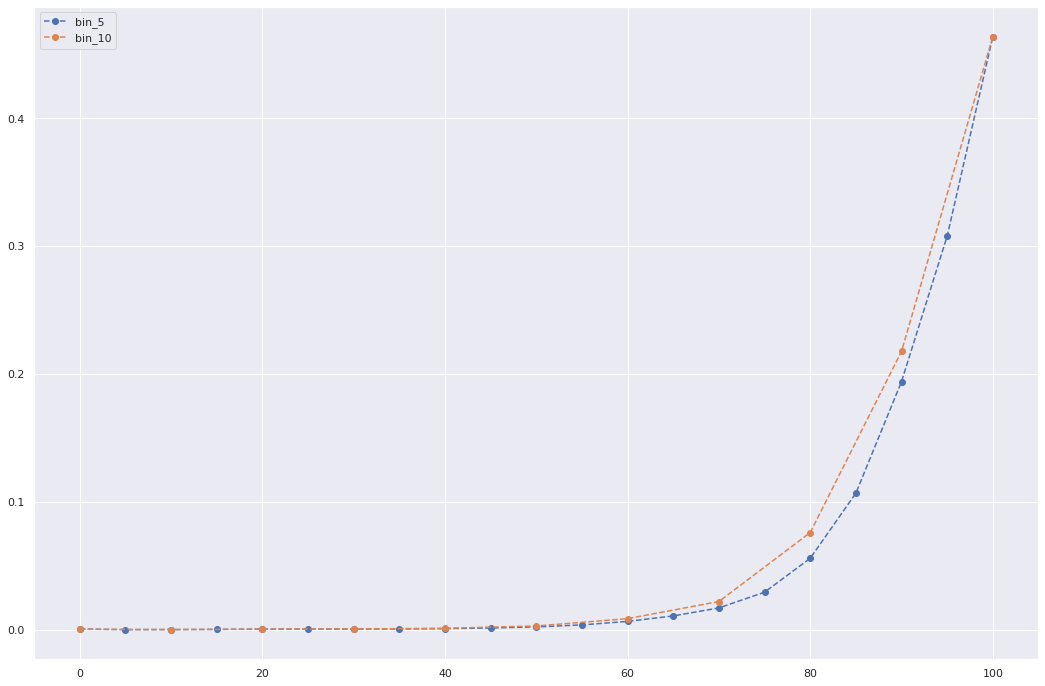

In [32]:
ax = baseline_age_mort_bin_5.plot(style='o--',figsize=(18,12),label='bin_5')
baseline_age_mort_bin_10.plot(ax=ax,style='o--',label='bin_10')
ax.legend(loc='upper left')

In [33]:
bin_1_expectation = baseline_age_mort_bin_1 * pop_bin_1.loc['2020','count']
bin_5_expectation = baseline_age_mort_bin_5 * pop_bin_5.loc['2020','count']
bin_10_expectation = baseline_age_mort_bin_10 * pop_bin_10.loc['2020','count']
bin_20_expectation = baseline_age_mort_bin_20 * pop_bin_20.loc['2020','count']

print (bin_1_expectation.sum())
print (bin_5_expectation.sum())
print (bin_10_expectation.sum())
print (bin_20_expectation.sum())

96947.61187071256
96946.17371789947
96856.5341902082
96544.47466095633


In [34]:
### excess deaths based on different binnings ###
print (dead_bin_1.loc['2020','count'].sum() - bin_1_expectation.sum())
print (dead_bin_5.loc['2020','count'].sum() - bin_5_expectation.sum())
print (dead_bin_10.loc['2020','count'].sum() - bin_10_expectation.sum())
print (dead_bin_20.loc['2020','count'].sum() - bin_20_expectation.sum())

1176.388129287443
1177.8262821005337
1267.4658097918
1579.52533904367


In [35]:
scb_prel_pop_bin = pd.cut(pop_df.index.get_level_values(1),[-1,64,79,89,200],labels=['-64','65-79','80-89','90+'])
scb_prel_dead_bin = pd.cut(dead_df.index.get_level_values(1),[-1,64,79,89,200],labels=['-64','65-79','80-89','90+'])

In [36]:
pop_df_scb_prel = pop_df.copy()
pop_df_scb_prel['scb_prel_bin'] = scb_prel_pop_bin

dead_df_scb_prel = dead_df.copy()
dead_df_scb_prel['scb_prel_bin'] = scb_prel_dead_bin
dead_df_scb_prel

count scb_prel_bin
year age                    
1968 0     1478          -64
     1       87          -64
     2       63          -64
     3       62          -64
     4       50          -64
...         ...          ...
2020 96    1789          90+
     97    1270          90+
     98    1065          90+
     99     759          90+
     100   1247          90+

[5353 rows x 2 columns]

In [37]:
dead_bin_prel = dead_df_scb_prel.groupby(['year','scb_prel_bin']).sum()
pop_bin_prel = pop_df_scb_prel.groupby(['year','scb_prel_bin']).sum()

mort_prel = (dead_bin_prel / pop_bin_prel).dropna()
mort_prel

count
year scb_prel_bin          
2002 -64           0.001775
     65-79         0.025262
     80-89         0.092014
     90+           0.242810
2003 -64           0.001765
...                     ...
2019 90+           0.210232
2020 -64           0.001264
     65-79         0.018582
     80-89         0.076659
     90+           0.233598

[76 rows x 1 columns]

In [38]:
mort_prel_15_18 = mort_prel.loc['2015' : '2018'].unstack().droplevel(0,axis=1)
mort_prel_15_18

scb_prel_bin,-64,65-79,80-89,90+
year,,,,
2015,0.001393,0.017732,0.078093,0.221373
2016,0.001363,0.017759,0.075700,0.222263
2017,0.001328,0.017585,0.076037,0.226129
2018,0.001298,0.017865,0.074139,0.222186


In [39]:
mort_prel_baseline  = mort_prel_15_18.mean()
mort_prel_baseline

scb_prel_bin
-64      0.001345
65-79    0.017735
80-89    0.075992
90+      0.222988
dtype: float64

In [40]:
pop_prel_unstacked = pop_bin_prel.unstack().droplevel(0,axis=1)
dead_prel_unstacked = dead_bin_prel.unstack().droplevel(0,axis=1)

In [41]:

prel_expect = (mort_prel_baseline * pop_prel_unstacked).sum(axis=1)
prel_observed = dead_prel_unstacked.sum(axis=1)
prel_observed

year
1968    82464
1969    83338
1970    80016
1971    82734
1972    84056
1973    85640
1974    86316
1975    88208
1976    90677
1977    88200
1978    89681
1979    91074
1980    91797
1981    92034
1982    90670
1983    90790
1984    90482
1985    94032
1986    93295
1987    93306
1988    96738
1989    92109
1990    95161
1991    95200
1992    94710
1993    97007
1994    91844
1995    93955
1996    94133
1997    93326
1998    93271
1999    94726
2000    93461
2001    93752
2002    95009
2003    92961
2004    90532
2005    91710
2006    91177
2007    91729
2008    91449
2009    90080
2010    90487
2011    89938
2012    91938
2013    90402
2014    88976
2015    90907
2016    90982
2017    91972
2018    92185
2019    88766
2020    98124
dtype: int64

In [42]:
### excess deaths based on scb prel binning with 4 age groups ###
(prel_observed - prel_expect).dropna()

year
2002    19168.321898
2003    16339.332617
2004    12923.715810
2005    13445.851641
2006    12088.672854
2007    11854.006058
2008    10585.282835
2009     8043.391028
2010     6486.723211
2011     4379.990978
2012     5365.485834
2013     2797.580107
2014      162.112686
2015     1069.433712
2016      -21.774596
2017      -29.188433
2018    -1065.420784
2019    -6177.153341
2020     2039.455396
dtype: float64

In [43]:
l = [dead_bin_1.loc['2020','count'].sum() - bin_1_expectation.sum(),
     dead_bin_5.loc['2020','count'].sum() - bin_5_expectation.sum(),
     dead_bin_10.loc['2020','count'].sum() - bin_10_expectation.sum(),
     dead_bin_20.loc['2020','count'].sum() - bin_20_expectation.sum(),
    prel_observed.loc['2020'] - prel_expect.loc['2020']]
     
twenty_twenty_excess = pd.DataFrame(l,columns=['excess'],index=['bin_1','bin_5','bin_10','bin_20','bin_scb_prel'])
twenty_twenty_excess

,excess
bin_1,1176.388129
bin_5,1177.826282
bin_10,1267.465810
bin_20,1579.525339
bin_scb_prel,2039.455396


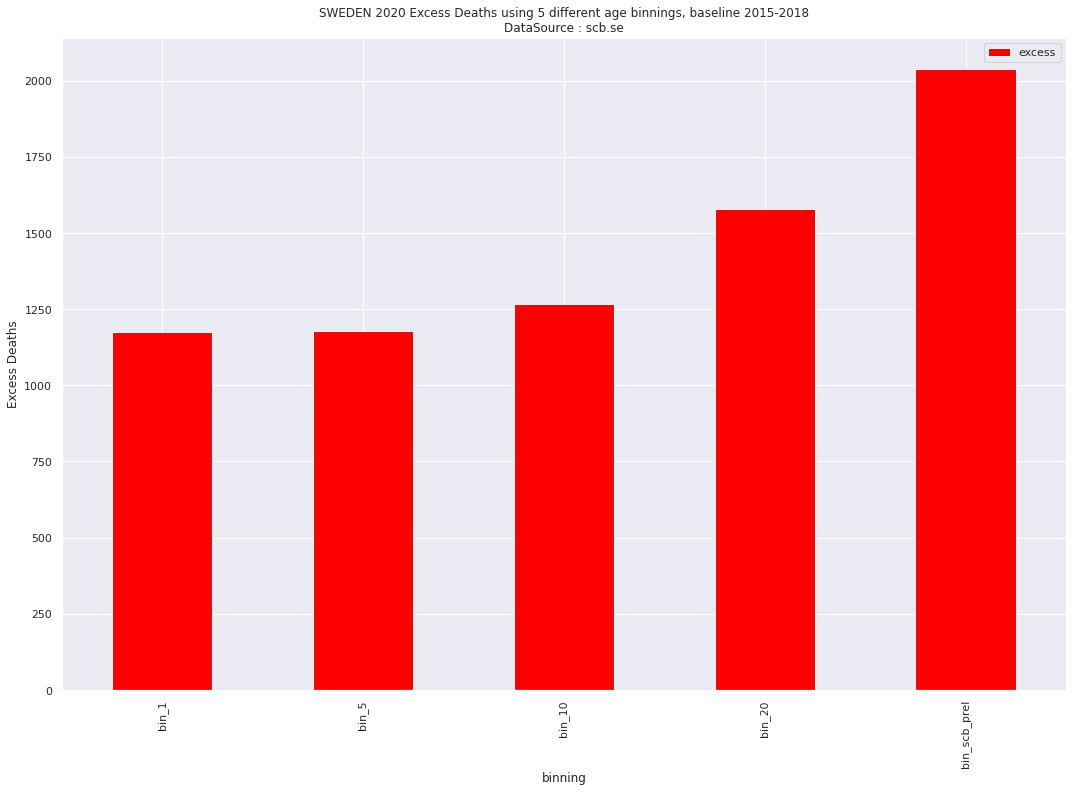

In [44]:
title = 'SWEDEN 2020 Excess Deaths using 5 different age binnings, baseline 2015-2018\nDataSource : scb.se'
twenty_twenty_excess.plot(kind='bar',figsize=(18,12),color='red',title=title)
plt.ylabel('Excess Deaths')
plt.xlabel('binning')
plt.savefig('scb_all_excess_different_bins.jpg',format='jpg')

In [45]:
def baseline(dead,pop,start_year='2015',end_year='2018'):
    u_dead = dead.unstack().droplevel(0,axis=1)
    u_pop = pop.unstack().droplevel(0,axis=1)
    
    mort = u_dead / u_pop
    return mort.dropna().loc[start_year : end_year].mean()

def expectation(pop,baseline):
    return (pop.unstack().droplevel(0,axis=1) * baseline).sum(axis=1)

### PARAM : start_year, end_year for baseline ###
start_year = '2015'
end_year = '2018'

expectation(pop_bin_5,baseline(dead_bin_5,pop_bin_5,start_year,end_year))
expectation(pop_bin_prel,baseline(dead_bin_prel,pop_bin_prel,start_year,end_year))

year
2002    75840.678102
2003    76621.667383
2004    77608.284190
2005    78264.148359
2006    79088.327146
2007    79874.993942
2008    80863.717165
2009    82036.608972
2010    84000.276789
2011    85558.009022
2012    86572.514166
2013    87604.419893
2014    88813.887314
2015    89837.566288
2016    91003.774596
2017    92001.188433
2018    93250.420784
2019    94943.153341
2020    96084.544604
dtype: float64

In [46]:
baseline_age_mort_bin_prel = baseline(dead_bin_prel,pop_bin_prel,start_year,end_year)
baseline_age_mort_bin_prel

scb_prel_bin
-64      0.001345
65-79    0.017735
80-89    0.075992
90+      0.222988
dtype: float64

In [47]:
bin_names = ['bin_1','bin_5','bin_10','bin_20','bin_prel']

expect = pd.DataFrame()

for b in bin_names:
    temp = pd.DataFrame(expectation(eval('pop_' + b),baseline(eval('dead_' + b),eval('pop_' + b),
                                                             start_year,end_year)))
    temp = temp.T
    temp.index = [b]
    expect = pd.concat([expect,temp])

expect = expect.T
expect

,bin_1,bin_5,bin_10,bin_20,bin_prel
year,,,,,
2002,75379.151432,75556.459899,76200.956721,79181.737404,75840.678102
2003,76250.098820,76332.939203,77041.094106,80252.414638,76621.667383
2004,77400.050413,77355.166397,78090.128598,81507.632703,77608.284190
2005,78413.019399,78561.254396,78871.427795,82600.480957,78264.148359
2006,79551.630758,79734.665217,79787.234069,83658.557236,79088.327146
2007,80490.219711,80578.286162,80487.432724,84420.927368,79874.993942
2008,81488.049896,81485.649382,81284.019431,85321.329812,80863.717165
2009,82582.684679,82447.720712,82148.049601,86028.019279,82036.608972
2010,83829.415068,83868.503006,83713.766414,86887.237865,84000.276789


In [48]:
observed = dead_df.unstack().droplevel(0,axis=1).sum(axis=1)
observed = observed.loc['2002':]
observed

year
2002    95009
2003    92961
2004    90532
2005    91710
2006    91177
2007    91729
2008    91449
2009    90080
2010    90487
2011    89938
2012    91938
2013    90402
2014    88976
2015    90907
2016    90982
2017    91972
2018    92185
2019    88766
2020    98124
dtype: int64

In [49]:
observed.index = expect.index


In [50]:
excess_df = pd.DataFrame()

for c in expect.columns:
    temp = pd.DataFrame (observed - expect[c])
    temp = temp.T
    temp.index = [c]
    excess_df = pd.concat([excess_df,temp])
    
excess_df

year,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
bin_1,19629.848568,16710.901180,13131.949587,13296.980601,11625.369242,11238.780289,9960.950104,7497.315321,6657.584932,4989.562360,6078.002641,3472.468702,616.750468,1366.746430,-5.416605,-210.273875,-1317.375723,-6747.758999,1176.388129
bin_5,19452.540101,16628.060797,13176.833603,13148.745604,11442.334783,11150.713838,9963.350618,7632.279288,6618.496994,4890.075875,6077.589762,3521.154889,773.301214,1391.664069,26.657192,-174.640710,-1326.940893,-6739.679040,1177.826282
bin_10,18808.043279,15919.905894,12441.871402,12838.572205,11389.765931,11241.567276,10164.980569,7931.950399,6773.233586,5008.321625,6139.225607,3586.090489,785.636124,1487.527069,65.241401,-196.877645,-1429.723340,-6746.730395,1267.465810
bin_20,15827.262596,12708.585362,9024.367297,9109.519043,7518.442764,7308.072632,6127.670188,4051.980721,3599.762135,2429.083921,3906.906255,1927.371994,-222.766245,1058.088344,19.380949,-29.243903,-1089.269530,-6381.931429,1579.525339
bin_prel,19168.321898,16339.332617,12923.715810,13445.851641,12088.672854,11854.006058,10585.282835,8043.391028,6486.723211,4379.990978,5365.485834,2797.580107,162.112686,1069.433712,-21.774596,-29.188433,-1065.420784,-6177.153341,2039.455396


/usr/local/lib64/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='year'>

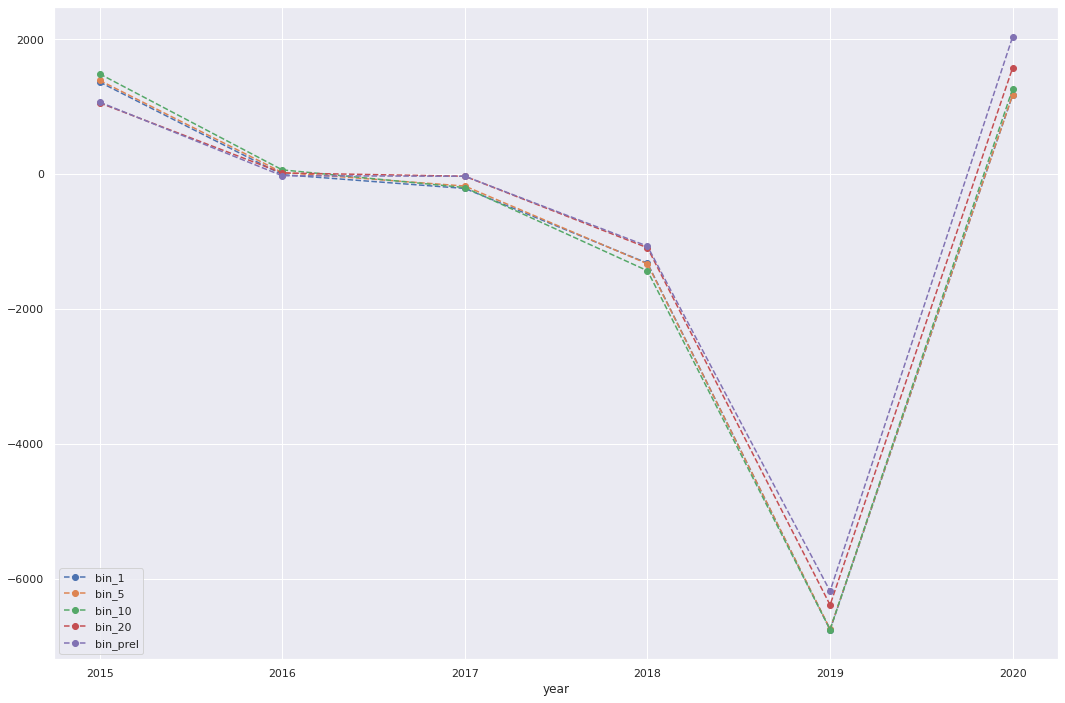

In [51]:
excess_df.T.loc['2015':].plot(figsize=(18,12),style='o--')

In [52]:
### reverse order of subtraction to subtract df from series ###
excess_2_df = expect.sub(observed,axis=0) * -1
excess_2_df

,bin_1,bin_5,bin_10,bin_20,bin_prel
year,,,,,
2002,19629.848568,19452.540101,18808.043279,15827.262596,19168.321898
2003,16710.901180,16628.060797,15919.905894,12708.585362,16339.332617
2004,13131.949587,13176.833603,12441.871402,9024.367297,12923.715810
2005,13296.980601,13148.745604,12838.572205,9109.519043,13445.851641
2006,11625.369242,11442.334783,11389.765931,7518.442764,12088.672854
2007,11238.780289,11150.713838,11241.567276,7308.072632,11854.006058
2008,9960.950104,9963.350618,10164.980569,6127.670188,10585.282835
2009,7497.315321,7632.279288,7931.950399,4051.980721,8043.391028
2010,6657.584932,6618.496994,6773.233586,3599.762135,6486.723211


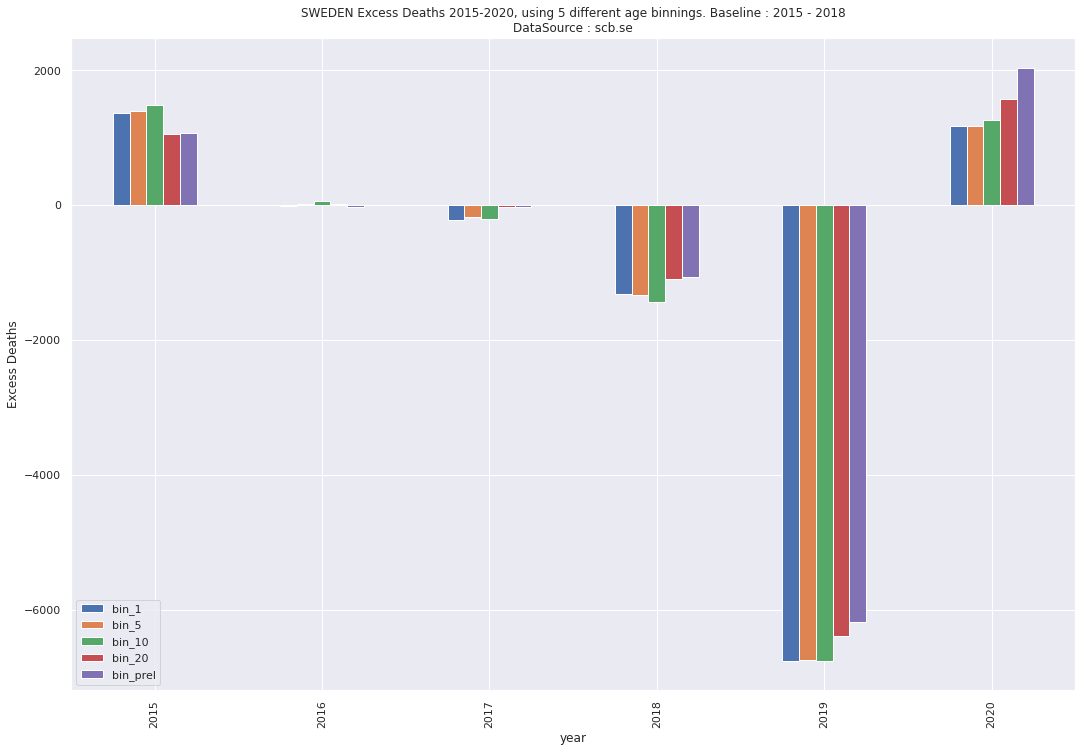

In [53]:
title = 'SWEDEN Excess Deaths 2015-2020, using 5 different age binnings. Baseline : 2015 - 2018\nDataSource : scb.se'
excess_2_df.loc['2015':].plot(kind='bar',figsize=(18,12),title=title)
plt.ylabel('Excess Deaths')
plt.savefig('scb_all_excess_5_bins_bar.jpg',format='jpg')


In [54]:
baseline_age_mort_bin_10

0      0.000313
10     0.000161
20     0.000483
30     0.000587
40     0.001126
50     0.002951
60     0.008674
70     0.022051
80     0.075992
90     0.217684
100    0.463904
dtype: float64

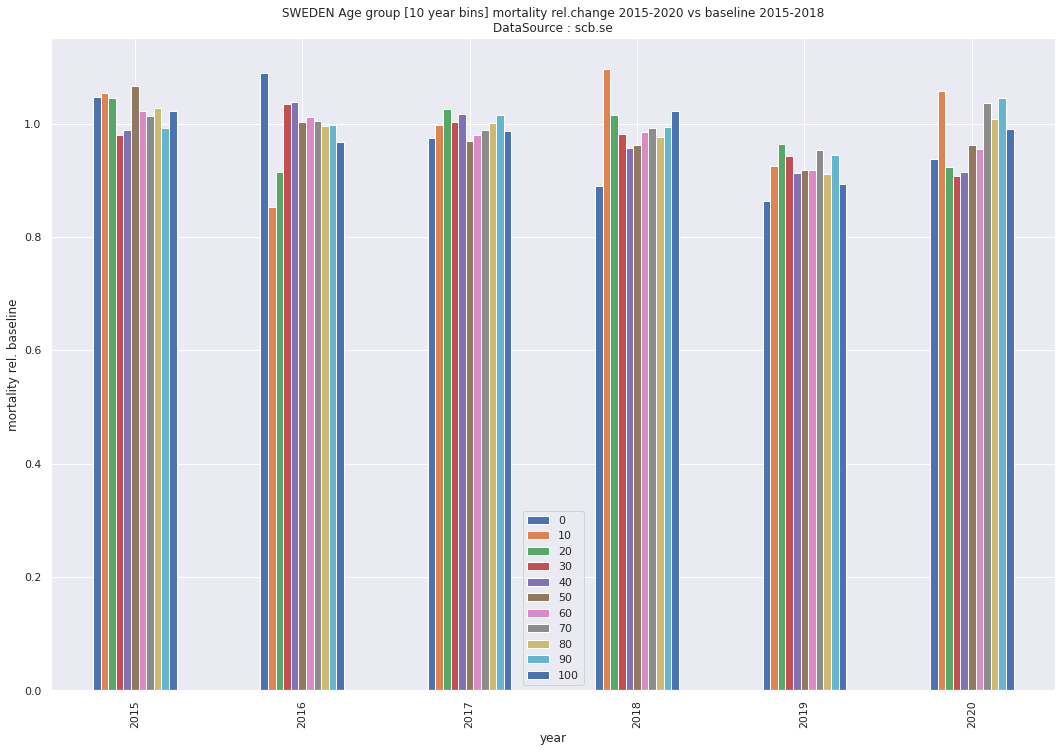

In [55]:
title='SWEDEN Age group [10 year bins] mortality rel.change 2015-2020 vs baseline 2015-2018\nDataSource : scb.se'
(age_mort_bin_10 / baseline_age_mort_bin_10).loc['2015':].plot(kind='bar',figsize=(18,12),title=title)
plt.ylabel('mortality rel. baseline')
plt.savefig('scb_all_excess_age_grp_mort_change.jpg',format='jpg')

Text(0, 0.5, 'mortality rel. baseline')

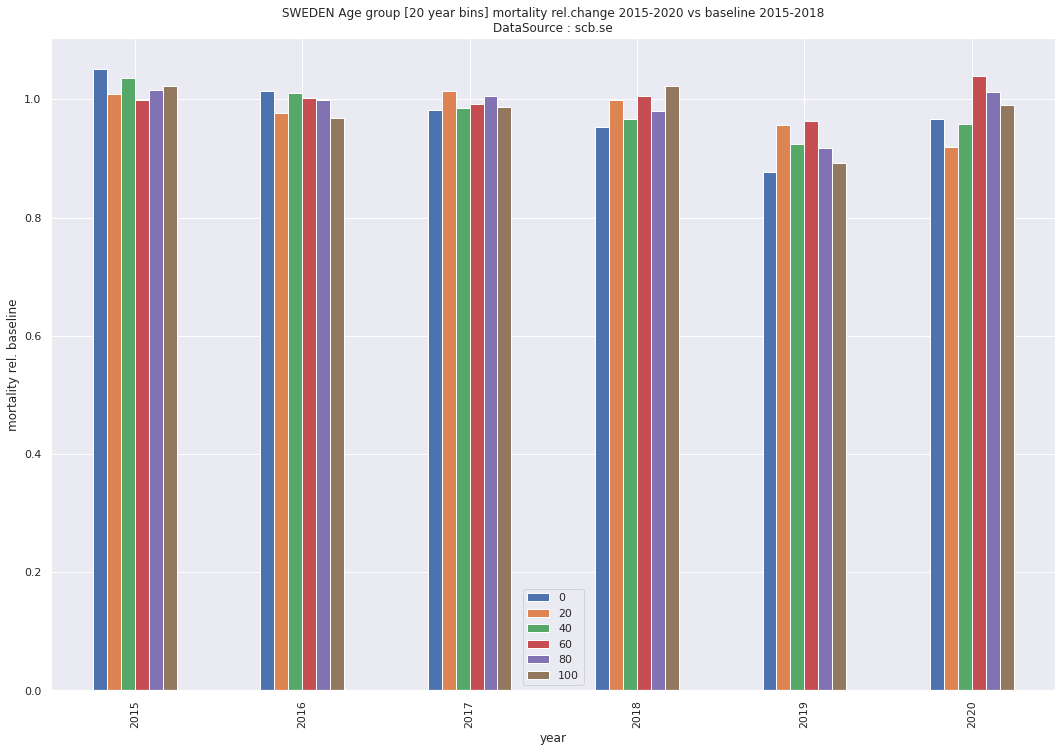

In [56]:
title='SWEDEN Age group [20 year bins] mortality rel.change 2015-2020 vs baseline 2015-2018\nDataSource : scb.se'
(age_mort_bin_20 / baseline_age_mort_bin_20).loc['2015':].plot(kind='bar',figsize=(18,12),title=title)
plt.ylabel('mortality rel. baseline')

Text(0, 0.5, 'mortality rel. baseline')

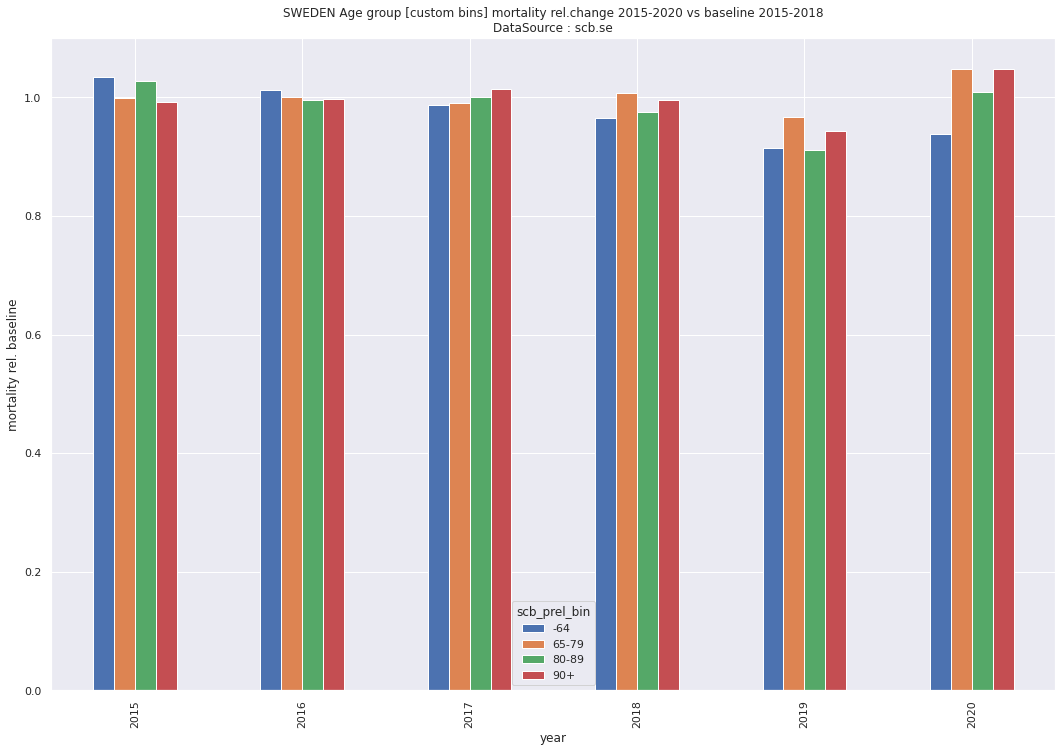

In [57]:
title='SWEDEN Age group [custom bins] mortality rel.change 2015-2020 vs baseline 2015-2018\nDataSource : scb.se'
(mort_prel.unstack().droplevel(0,axis=1) / baseline_age_mort_bin_prel).loc['2015':].plot(kind='bar',figsize=(18,12),title=title)
plt.ylabel('mortality rel. baseline')

Text(0, 0.5, 'mortality rel. baseline')

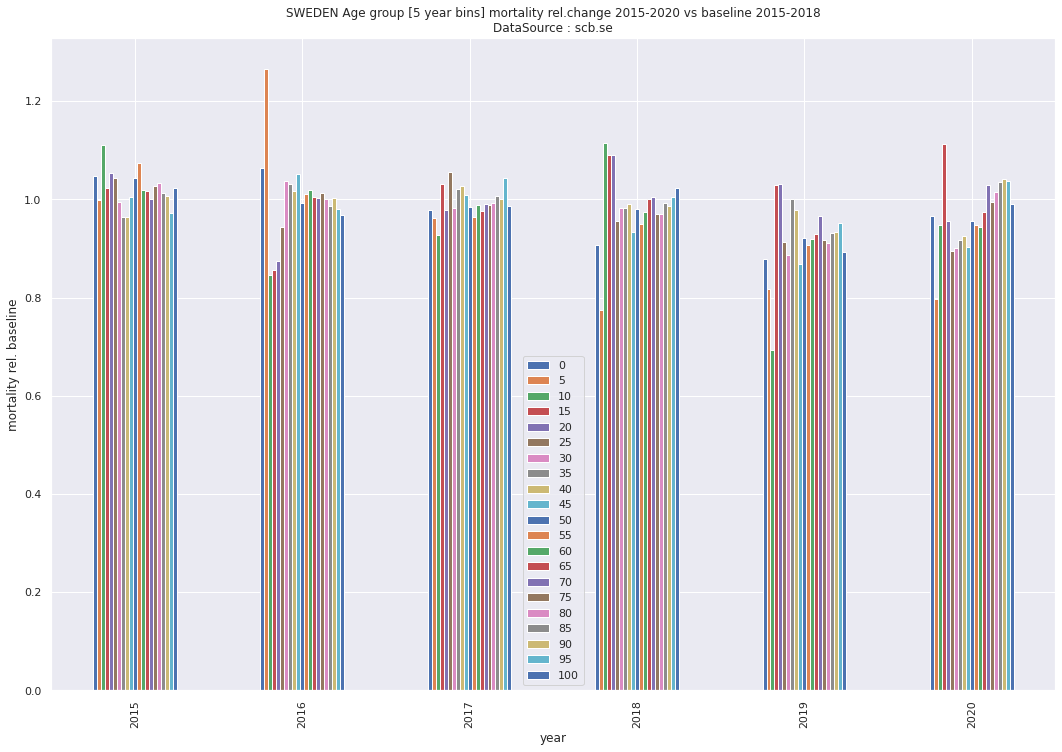

In [58]:
title='SWEDEN Age group [5 year bins] mortality rel.change 2015-2020 vs baseline 2015-2018\nDataSource : scb.se'
(age_mort_bin_5 / baseline_age_mort_bin_5).loc['2015':].plot(kind='bar',figsize=(18,12),title=title)
plt.ylabel('mortality rel. baseline')

0      0.000313
10     0.000161
20     0.000483
30     0.000587
40     0.001126
50     0.002951
60     0.008674
70     0.022051
80     0.075992
90     0.217684
100    0.463904
dtype: float64

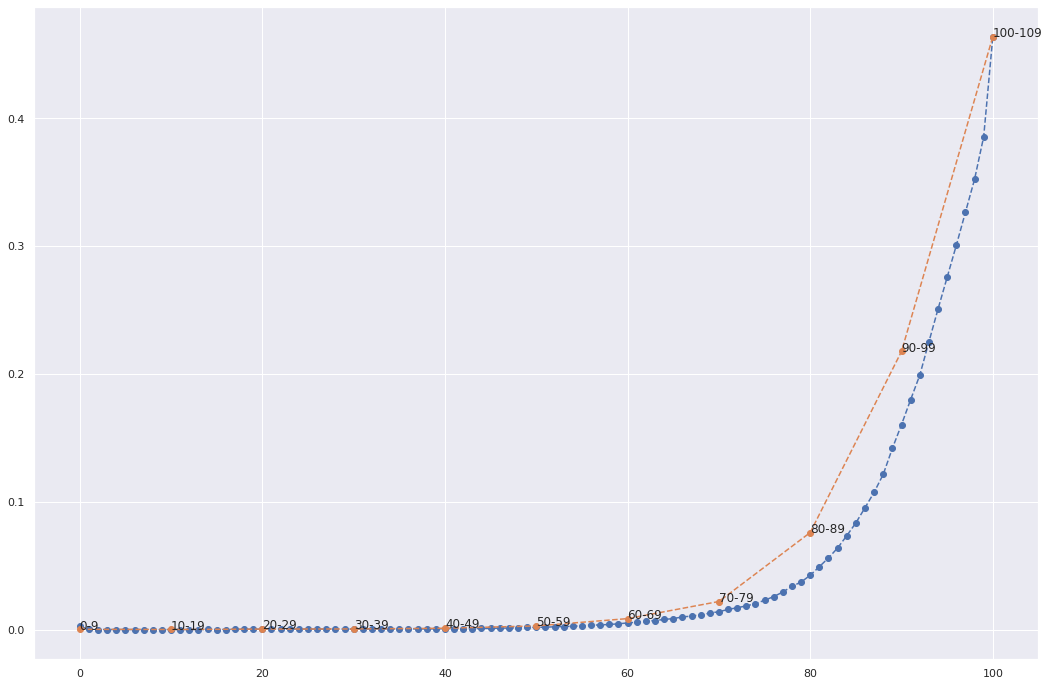

In [59]:
ax = baseline_age_mort_bin_1.plot(figsize=(18,12),style='o--')
baseline_age_mort_bin_10.plot(ax=ax,style='o--')

x_s,y_s = baseline_age_mort_bin_10.index,baseline_age_mort_bin_10

xys = list(zip(x_s,y_s))

bin_width = baseline_age_mort_bin_10.index[1] - baseline_age_mort_bin_10.index[0] -1

for i,xy in enumerate(xys):
    ax.annotate(str(baseline_age_mort_bin_10.index[i]) + '-' + str(
        baseline_age_mort_bin_10.index[i] + bin_width),xy)

baseline_age_mort_bin_10

In [60]:
idx = pd.IndexSlice
avg_70_plus_mort = dead_bin_1.loc[idx[start_year:end_year,70:],:].sum() / pop_bin_1.loc[idx[start_year : end_year,70:],:].sum()
avg_70_plus_mort

count    0.051928
dtype: float64

In [61]:
baseline_age_mort_bin_1

0      0.002717
1      0.000187
2      0.000131
3      0.000079
4      0.000100
         ...   
96     0.300639
97     0.326506
98     0.352301
99     0.385650
100    0.463904
Length: 101, dtype: float64

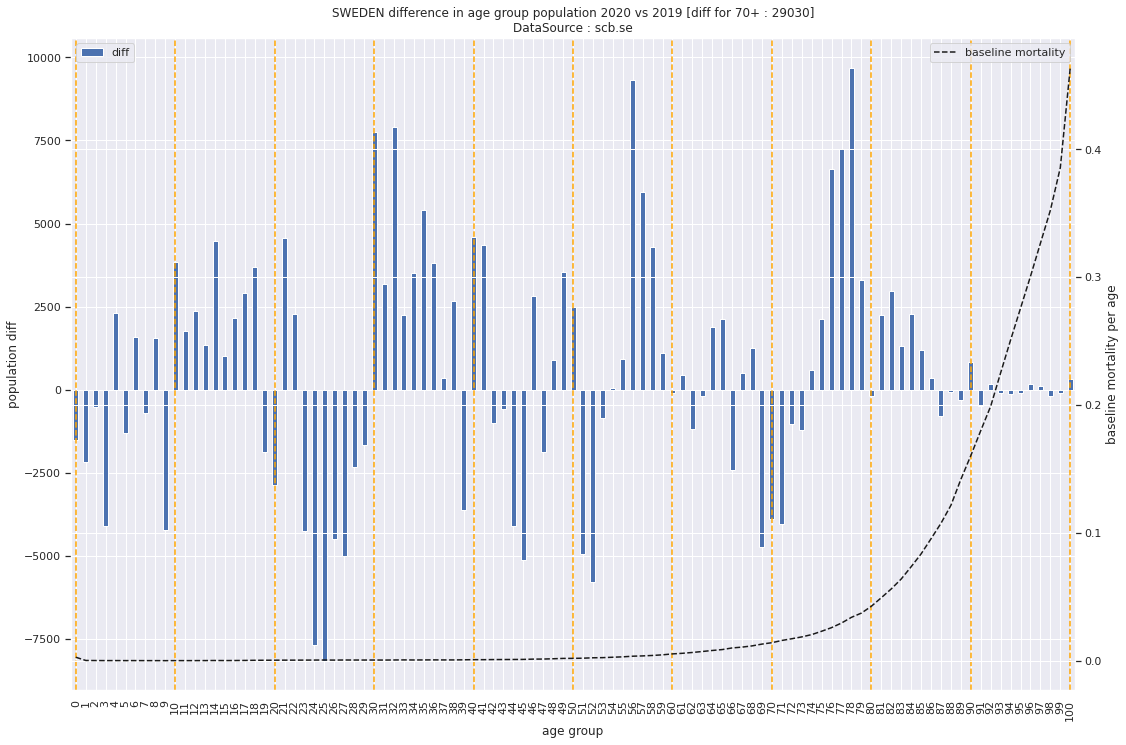

In [62]:
pop_bin_1_2019 = pop_bin_1.unstack().droplevel(0,axis=1).loc['2019']
pop_bin_1_2020 = pop_bin_1.unstack().droplevel(0,axis=1).loc['2020']

more_70_plus = pop_bin_1_2020.loc[70:].sum() - pop_bin_1_2019.loc[70:].sum()

diff_20_19_bin_1 = pop_bin_1_2020 - pop_bin_1_2019

title = 'SWEDEN difference in age group population 2020 vs 2019 [diff for 70+ : {}]\nDataSource : scb.se'.format(
more_70_plus)

ax = diff_20_19_bin_1.plot(figsize=(18,12),kind='bar',title=title,label='diff')

for i in range(0,len(diff_20_19_bin_1),10):
    ax.axvline(i,ls='dashed',color='orange')
    
ax.set_ylabel('population diff')
ax.set_xlabel('age group')

ax.legend(loc='upper left')

ax2 = plt.twinx()
ax2.plot(baseline_age_mort_bin_1,color='k',ls='dashed',label='baseline mortality')
ax2.set_ylabel('baseline mortality per age')
#ax2.set_yscale('log')
ax2.legend(loc='upper right')

plt.savefig('scb_all_excess_pop_diff.jpg',format='jpg')

/usr/local/lib64/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:>

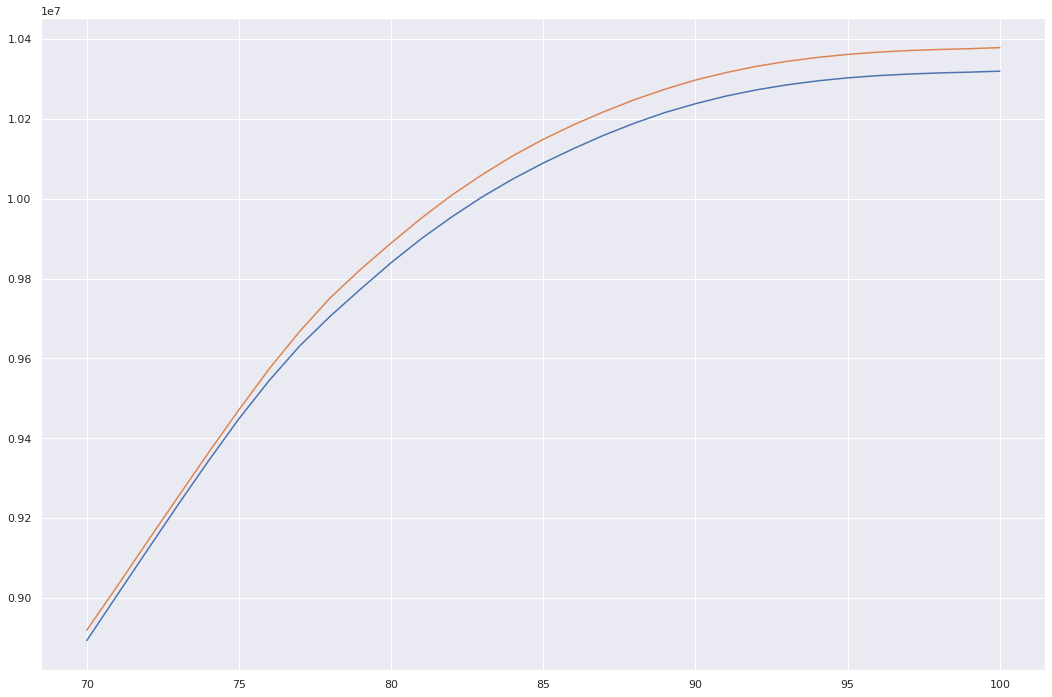

In [63]:
pop_bin_1_2019_cum = pop_bin_1_2019.cumsum()
pop_bin_1_2020_cum = pop_bin_1_2020.cumsum()

ax = pop_bin_1_2019_cum.loc[70:].plot(figsize=(18,12))
pop_bin_1_2020_cum.loc[70:].plot(ax=ax)

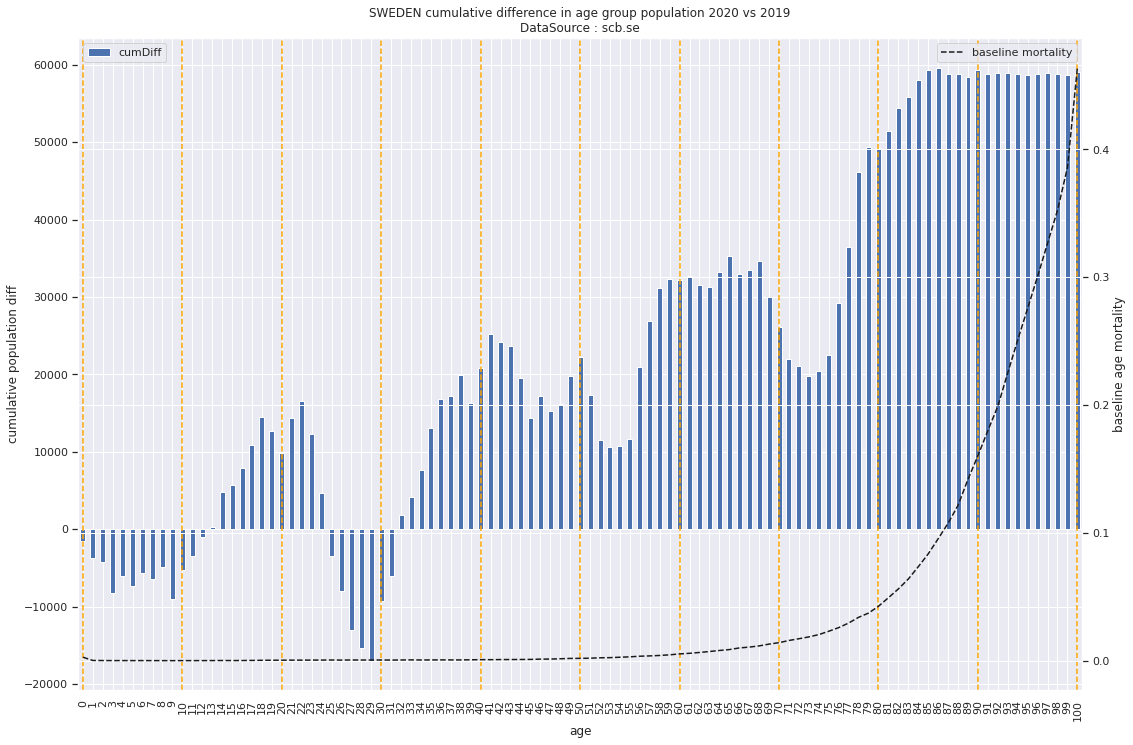

In [64]:
title = 'SWEDEN cumulative difference in age group population 2020 vs 2019\nDataSource : scb.se'
ax = (pop_bin_1_2020_cum - pop_bin_1_2019_cum).plot(figsize=(18,12),title=title,kind='bar',label='cumDiff')

ax.set_ylabel('cumulative population diff')
ax.legend(loc = 'upper left')

for i in range(0,len(diff_20_19_bin_1),10):
    ax.axvline(i,ls='dashed',color='orange')

ax2 = plt.twinx()

ax2.plot(baseline_age_mort_bin_1,color='k',ls='dashed',label='baseline mortality')
ax2.legend(loc='upper right')
ax2.set_ylabel('baseline age mortality')

ax.set_xlabel('age')

plt.savefig('scb_all_excess_pop_cum_diff.jpg',format='jpg')

In [65]:
pop_bin_1_2020.loc[70:].sum() - pop_bin_1_2019.loc[70:].sum()

29030

In [66]:
baseline_age_mort_bin_1[70:]

70     0.014083
71     0.015823
72     0.017177
73     0.018614
74     0.020410
75     0.023033
76     0.025872
77     0.029463
78     0.033933
79     0.037246
80     0.042575
81     0.049270
82     0.056135
83     0.063890
84     0.073488
85     0.083531
86     0.095381
87     0.107485
88     0.121551
89     0.141847
90     0.160422
91     0.179966
92     0.199061
93     0.225195
94     0.250823
95     0.275700
96     0.300639
97     0.326506
98     0.352301
99     0.385650
100    0.463904
dtype: float64

In [67]:
age = 70
weighted_avg_mort_70_plus_19 = (age_mort_bin_1.loc['2019'].loc[age:] * pop_bin_1.loc['2019'].loc[age:,'count']).sum() / pop_bin_1.loc['2019'].loc[age:,'count'].sum()
weighted_avg_mort_70_plus_20 = (age_mort_bin_1.loc['2020'].loc[age:] * pop_bin_1.loc['2020'].loc[age:,'count']).sum() / pop_bin_1.loc['2020'].loc[age:,'count'].sum()

In [68]:
print (weighted_avg_mort_70_plus_19) # 2019 
print (weighted_avg_mort_70_plus_20) # 2020 
print (avg_70_plus_mort) # baseline : avg mort 70+ 2015-2018




0.04759755903284642
0.05233687206634566
count    0.051928
dtype: float64


In [69]:
age_mort_bin_1.loc['2020']

0      0.002751
1      0.000189
2      0.000101
3      0.000050
4      0.000096
         ...   
96     0.313365
97     0.319738
98     0.393424
99     0.396345
100    0.459300
Name: 2020, Length: 101, dtype: float64

In [70]:
# nr of days studying covid # 
pd.date_range('2020-02-13','2021-06-12')

DatetimeIndex(['2020-02-13', '2020-02-14', '2020-02-15', '2020-02-16',
               '2020-02-17', '2020-02-18', '2020-02-19', '2020-02-20',
               '2020-02-21', '2020-02-22',
               ...
               '2021-06-03', '2021-06-04', '2021-06-05', '2021-06-06',
               '2021-06-07', '2021-06-08', '2021-06-09', '2021-06-10',
               '2021-06-11', '2021-06-12'],
              dtype='datetime64[ns]', length=486, freq='D')